In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [2]:
df = pd.read_csv('/content/HRDataset_v14.csv')

In [3]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [5]:
df.isnull().sum() 

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [6]:
df['Sex'].unique()

array(['M ', 'F'], dtype=object)

In [7]:
df['Department'].unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

In [8]:
df['Position'].replace('Data Analyst ','Data Analyst',inplace=True)

In [9]:
df.dropna(how='all', inplace=True)

In [10]:
df[['PerformanceScore','PerfScoreID']]

,PerformanceScore,PerfScoreID
0,Exceeds,4
1,Fully Meets,3
2,Fully Meets,3
3,Fully Meets,3
4,Fully Meets,3
...,...,...
306,Fully Meets,3
307,PIP,1
308,Exceeds,4
309,Fully Meets,3


In [11]:
df.drop(['DaysLateLast30','LastPerformanceReview_Date',
         'DateofTermination','TermReason','DaysLateLast30','Zip'],axis=1,inplace=True)

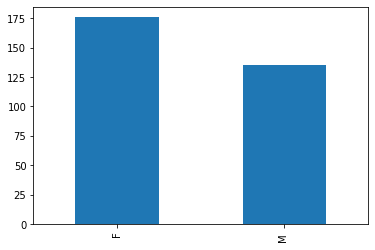

In [31]:
df['Sex'].value_counts() 
df['Sex'].value_counts().plot(kind='bar')

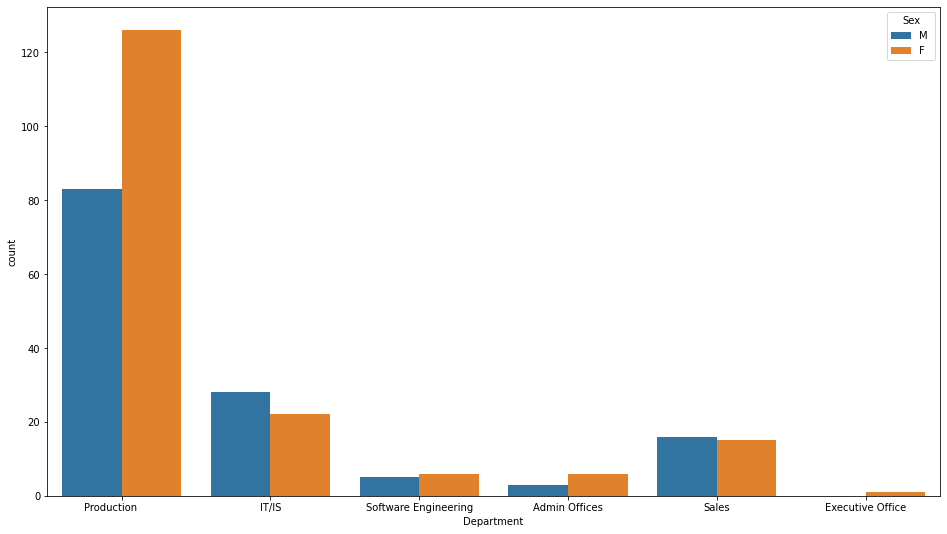

In [32]:
plt.figure(figsize=(16,9))
ax=sns.countplot(x=df['Department'],hue=df['Sex'])

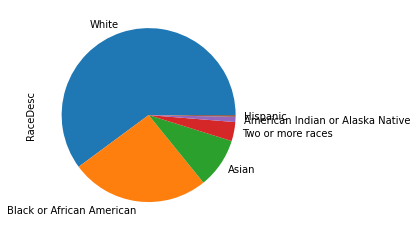

In [33]:
df['RaceDesc'].value_counts().plot(kind='pie')

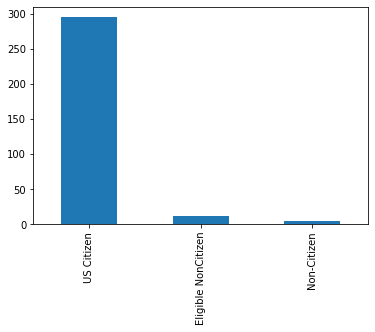

In [34]:
df['CitizenDesc'].value_counts().plot(kind='bar')

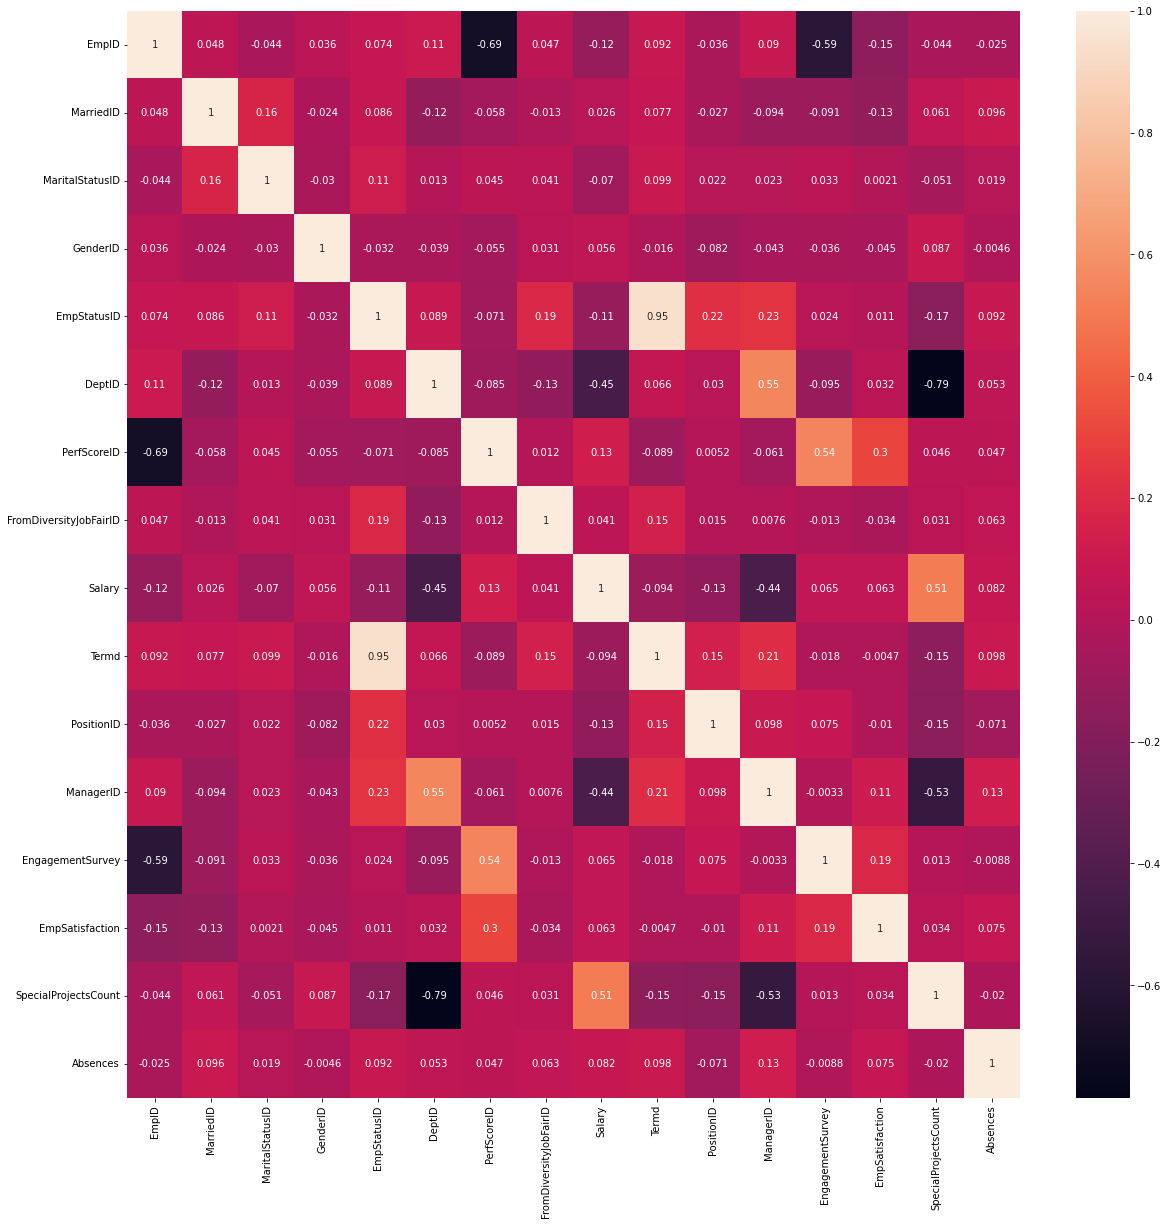

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [22]:
df['ManagerID'] = df['ManagerID'].replace(np.nan, 39.0)

In [23]:
df[df['ManagerName']=='Webster Butler'][['ManagerName','ManagerID']]

,ManagerName,ManagerID
4,Webster Butler,39.0
19,Webster Butler,39.0
30,Webster Butler,39.0
44,Webster Butler,39.0
65,Webster Butler,39.0
88,Webster Butler,39.0
89,Webster Butler,39.0
105,Webster Butler,39.0
124,Webster Butler,39.0
135,Webster Butler,39.0


In [24]:
X = df[['EmpSatisfaction','EngagementSurvey','SpecialProjectsCount','ManagerID']]
y = df['PerfScoreID']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
lm = LinearRegression()

In [27]:
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3549900195003858
MSE: 0.21177830742066825
RMSE: 0.4601937716013421


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


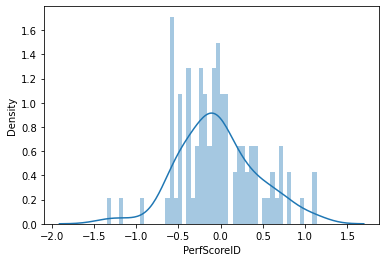

In [30]:
sns.distplot((y_test-predictions),bins=50)